<h1>Contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conexión-Serial-con-Python" data-toc-modified-id="Conexión-Serial-con-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conexión Serial con Python</a></span></li><li><span><a href="#Lectura-de-datos-por-puerto-serie" data-toc-modified-id="Lectura-de-datos-por-puerto-serie-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lectura de datos por puerto serie</a></span></li><li><span><a href="#Lectura-de-datos-con-ciclo-For" data-toc-modified-id="Lectura-de-datos-con-ciclo-For-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lectura de datos con ciclo <code>For</code></a></span></li><li><span><a href="#Lectura-de-datos-con-ciclo-While" data-toc-modified-id="Lectura-de-datos-con-ciclo-While-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lectura de datos con ciclo <code>While</code></a></span></li><li><span><a href="#open()-&amp;-close().-Abriendo-y-cerrando-el-puerto-serial" data-toc-modified-id="open()-&amp;-close().-Abriendo-y-cerrando-el-puerto-serial-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><code>open()</code> &amp; <code>close()</code>. Abriendo y cerrando el puerto serial</a></span></li><li><span><a href="#Propiedades-del-objeto-serial-arduino" data-toc-modified-id="Propiedades-del-objeto-serial-arduino-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Propiedades del objeto serial <code>arduino</code></a></span></li><li><span><a href="#Graficar-los-datos" data-toc-modified-id="Graficar-los-datos-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Graficar los datos</a></span></li><li><span><a href="#Grafica-en-&quot;tiempo-real&quot;" data-toc-modified-id="Grafica-en-&quot;tiempo-real&quot;-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Grafica en "<em>tiempo real</em>"</a></span></li></ul></div>

# Taller: Adquisición de Datos con Arduino y Jupyter

## Conexión Serial con Python

En esta sección veremos los fundamentos de Python para una conexión serial con Arduino, las librerías y los comandos necesarios para leer el puerto serie.

Primero importamos las librerias necesarias:

In [63]:
%matplotlib notebook
%matplotlib notebook

import serial as ser# Para la conexión serial
import time # Para dar una pausa a la lectura serial
import matplotlib.pyplot as plt # Para graficar los datos
from matplotlib import style
import numpy as np # Para la manipulación de arrays y datos
from matplotlib.animation import FuncAnimation

Creamos el objeto `arduino` que inicializa (abre) el puerto serie donde está conectado nuestro Arduino. A este objeto le pasamos los parámetros del puerto `COM`, los `baudios` y el `tiempo de espera` (si es necesario) con el siguiente comando:

In [64]:
#  objeto serial ( puerto , baudios)
arduino = ser.Serial('COM4', 9600)
arduino.flushInput() # Para limpar el buffer de entrada del puerto serie
time.sleep(2) # Hacemos una pausa de 2 segundos

## Lectura de datos por puerto serie

La información que se transmite por el bus serial está empaquetada en bytes. Para leer una serie de bytes utilizamos el método `readline(parametro)`, donde parámetro es el numero (en entero) de bytes a leer. Por defecto lee hasta agotar el tiempo de espera entre paquetes de información. Creamos entonces una vairable que lee una cadena de bytes:

In [3]:
# cadena de bytes
b = arduino.readline() # Lee una linea de bytes de información
print(b) # Imprime el contenido de la variable b

b'491\r\n'


Ya que el buffer serial está almacenando los bytes que envía el Arduino cada segundo, tendríamos que hacer tantas lecturas del puerto como datos hay en el buffer. Por lo tanto, para tener el último dato que envía el Arduino, no podríamos dejar pasar ninguna lectura. Esto se podría resolver limpiando el buffer antes de hacer una lectura con el método `flushInput()` del objeto serial:

In [4]:
# cadenade bytes
arduino.flushInput() # Limpia el buffer de datos del puerto serie
b = arduino.readline()
print(b)

b'684\r\n'



Como podemos observar, la cadena de bytes inicia con un caracter `b` que indica que se trata de bytes de información, seguido de la información que contienen esos bytes (`'612\r\n'` ). `\r` es el byte para el *carrier return* y `\n` es para una *nueva linea*. Todo está entre comillas sencillas representando una cadena de caracteres. Podemos comprobar el tipo de variable de `b` con el siguiente comando:

In [4]:
type(b) # Muestra el tipo de dato de una variable

bytes

Y observamos que efectivamente es de tipo Byte. Para poderlo convertir a número es necesario primero convertilo a tipo caracter. Para ello le quitaremos el carrier return y el salto de linea con el método `rstrip()`:

In [5]:
b = b.rstrip()
print(b)

b'491'


Para convertir ahora a caracter utilizamos el método `decode()`:

In [6]:
b = b.decode() # Acepta como parámetros el tipo de codificación (p.e. 'utf-8') y opción para ignorar errores 'ignore'
b

'491'

Si comprobamos de nuevo:

In [7]:
type(b)

str

Ahora es de tipo *string* (cadena de caracteres). Sin embargo, con este tipo de dato no se pueden hacer operaciones numéricas. Para convertirlo a un valor numérico, podemos usar las funciones `int()` o `float()`.

In [8]:
b = float(b)
print(b)
type(b)

491.0


float

## Lectura de datos con ciclo `For`

Con el siguiente ciclo `for` podemos leer tantos datos como queramos del puerto serie. Esta forma la llamaremos ***en demanda*** y se usaría cuando sabemos cuantos datos queremos y cada cuanto tiempo.

In [10]:
# Rango de 0 a 5
for i in range(5):
    arduino.flushInput()
    b = arduino.readline() # Leemos los datos
    b = b.rstrip().decode() # Quitamos los \r\n y lo conertimos a tipo string
    b = float(b) # Lo convertimos a tipo flotante
#     time.sleep(5)
    print(b)

684.0
684.0
684.0
684.0
685.0


## Lectura de datos con ciclo `While`

Cuando no sabes cuantos datos queremos leer, entonces estariamos haciendo un ***streming*** de datos, esto es, adquirir datos continuamente hasta que el usuario (o un evento) termina la comunicación. Esto se pude hacer con un ciclo `while`.

In [9]:
while True:
    arduino.flushInput()
    b = arduino.readline() # Leemos los datos
    b = b.rstrip().decode() # Quitamos los \r\n y lo conertimos a tipo string
    b = float(b) # Lo convertimos a tipo flotante
    #     time.sleep(5)
    print(b)

490.0
490.0
491.0
490.0
490.0
490.0
490.0
490.0
490.0


KeyboardInterrupt: 

In [10]:
while True:
    try:
        arduino.flushInput()
        b = arduino.readline() # Leemos los datos
        b = b.rstrip().decode() # Quitamos los \r\n y lo conertimos a tipo string
        b = float(b) # Lo convertimos a tipo flotante
        #     time.sleep(5)
        print(b)
    except:
        print("Streaming terminado")
        break

491.0
490.0
490.0
491.0
490.0
490.0
490.0
490.0
490.0
Streaming terminado


## `open()` & `close()`. Abriendo y cerrando el puerto serial

Hasta ahora hemos inicializado el puerto, pero no lo hemos cerrado. Una vez que el puerto serie ya no es necesario, porque se han leido todos los datos que queremos, es conveniente cerrarlo para terminar la comunicación y así liberar el espacio que ocupa el buffer en la memoria RAM, o vlverlo a abrir sin tener que volver a declarlo e iniciar la transferencia de datos. Esto lo logramos con las funciones `open()` y `close()`.

In [11]:
arduino.close() # Se ha cerrado el puerto serie COM4

In [12]:
arduino.open()

## Propiedades del objeto serial `arduino`

In [13]:
arduino.port

'COM4'

In [14]:
arduino.baudrate

9600

In [15]:
arduino.name

'COM4'

In [16]:
arduino.is_open

True

In [23]:
if arduino.is_open == False:
    arduino.open()
else:
    while True:
        try:
            arduino.flushInput()
            b = arduino.readline() # Leemos los datos
            b = b.rstrip().decode() # Quitamos los \r\n y lo conertimos a tipo string
            b = float(b) # Lo convertimos a tipo flotante
            #     time.sleep(5)
            print(b)
        except:
            print("Streaming terminado")
            # arduino.close()
            break

490.0
490.0
490.0
490.0
490.0
490.0
490.0
490.0
490.0
490.0
Streaming terminado


## Graficar los datos

Hasta ahora hemos leido los datos disponibles en el buffer serial, los cuales ya no están disponibles una vez que han sido leidos. Para graficar los datos adquiridos es conveniente guardarlos en una variable para su posterior manipulación. Para ello haremos uso de las funciones de `matplotlib`. Creamos la variable que almacenará los datos:

In [54]:
datos = []

Para agregar los datos, conforme van siendo leídos, a esta variable, que es una lista, utilizaremos el método `append()`:

In [75]:
if arduino.is_open == False:
    arduino.open()
else:
    while True:
        try:
            arduino.flushInput()
            b = arduino.read_until() # Leemos los datos
            b = b.rstrip().decode() # Quitamos los \r\n y lo conertimos a tipo string
            b = float(b) # Lo convertimos a tipo flotante
            #     time.sleep(5)
            print(b)
            datos.append(b) # Agregamos los datos a la lista
        except:
            print("Streaming terminado")
            # arduino.close()
            break

490.0
490.0
Streaming terminado


In [21]:
print(datos) # Mostramos el contenido de la lista 'datos'

[490.0, 490.0]


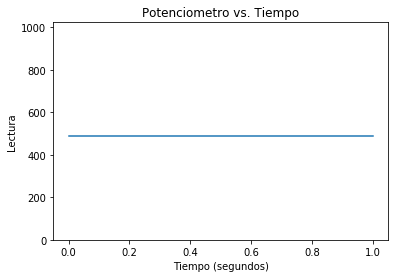

In [22]:
%matplotlib inline
# fig, ax = plt.subplots()
plt.plot(datos)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Lectura')
plt.title('Potenciometro vs. Tiempo')
plt.ylim([0,1023])
plt.show()

## Grafica en "*tiempo real*"

In [59]:
x = []
datos = []

<IPython.core.display.Javascript object>


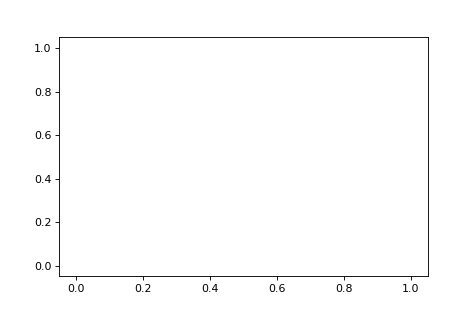

In [60]:
fig, ax = plt.subplots()
line, = ax.plot([])

In [76]:
def animacion(i, datos, arduino):
    arduino.flushInput()
    b = arduino.readline() # Leemos los datos
    b_string = b.rstrip().decode() # Quitamos los \r\n y lo conertimos a tipo string
    b_num = float(b_string) # Lo convertimos a tipo flotante
    x.append(i)
    datos.append(b_num)
        
    # Agregamos un límite de 100 datos 
    datos = datos[-100:]
    # Limpiamos el último frame y dibujamos el siguiente
    ax.clear()
#     ax.plot(i, datos)
    line.set_data((x, datos))
# Damos formato a la gráfica
    ax.set_ylim([0,1023])
    ax.set_title("Potenciometro vs. Tiempo")
    ax.set_ylabel("Lectura")
    ax.set_xlabel("tiempo(s)")
    return line

In [77]:
# Corremos la función de animación para mostrar el gráfico
%matplotlib notebook

ani = animation.FuncAnimation(fig, animacion, fargs=(x, datos), interval=5)
# display(ani)
plt.show()


# Al final cerramos el puerto cierre
# arduino.close()
print("Fin")

Fin


In [71]:
arduino.close()

In [ ]:
#  objeto serial ( puerto , baudios )
# arduino = ser.Serial('COM4', 9600)
# arduino.flushInput() # Para limpar el buffer de entrada del puerto serie
# time.sleep(2) # Hacemos una pausa de 2 segundos
# datos = [] # Lista vacía

# while True:
#     ser_bytes = arduino.readline()
#     decoded_bytes = float(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
#     print(decoded_bytes)
#     except:
#         print("Keyboard Interrupt")
#         break
    
# arduino.close()

In [ ]:
# %matplotlib inline
# plt.plot(data)
# plt.xlabel('Time (seconds)')
# plt.ylabel('Potentiometer Reading')
# plt.title('Potentiometer Reading vs. Time')
# plt.show()

In [76]:
%load_ext watermark
%watermark -v -p serial,matplotlib,jupyter,conda,pip

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.8.0

serial    : 3.5
matplotlib: 3.1.1
jupyter   : 1.0.0
conda     : 4.10.3
pip       : 19.2.3

